<a href="https://colab.research.google.com/github/antoniadineti/Aplicatie-de-task-uri/blob/main/set_nou_date.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# === 1. Importă bibliotecile necesare
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# === 2. Încarcă setul de date
data = pd.read_csv('heart.csv')  # Asigură-te că fișierul e încărcat în Colab

In [ ]:
# === 3. Analiza valorilor lipsă
print("📌 Valori lipsă pe coloană:\n", data.isnull().sum())

📌 Valori lipsă pe coloană:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# === 4. Statistici descriptive + std
print("\n Statistici descriptive:\n", data.describe().T)



 Statistici descriptive:
            count        mean        std    min     25%     50%     75%    max
age       1025.0   54.434146   9.072290   29.0   48.00   56.00   61.00   77.0
sex       1025.0    0.695610   0.460373    0.0    0.00    1.00    1.00    1.0
cp        1025.0    0.942439   1.029641    0.0    0.00    1.00    2.00    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.00  130.00  140.00  200.0
chol      1025.0  246.000000  51.592510  126.0  211.00  240.00  275.00  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.00    0.00    0.00    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.00    1.00    1.00    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.00  152.00  166.00  202.0
exang     1025.0    0.336585   0.472772    0.0    0.00    0.00    1.00    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.00    0.80    1.80    6.2
slope     1025.0    1.385366   0.617755    0.0    1.00    1.00    2.00    2.0
ca        1025.0    0.754146   1.0307

In [ ]:
low_variance = data.std()[data.std() < 0.01]
print("\n Coloane cu deviație standard mică:\n", low_variance)


 Coloane cu deviație standard mică:
 Series([], dtype: float64)


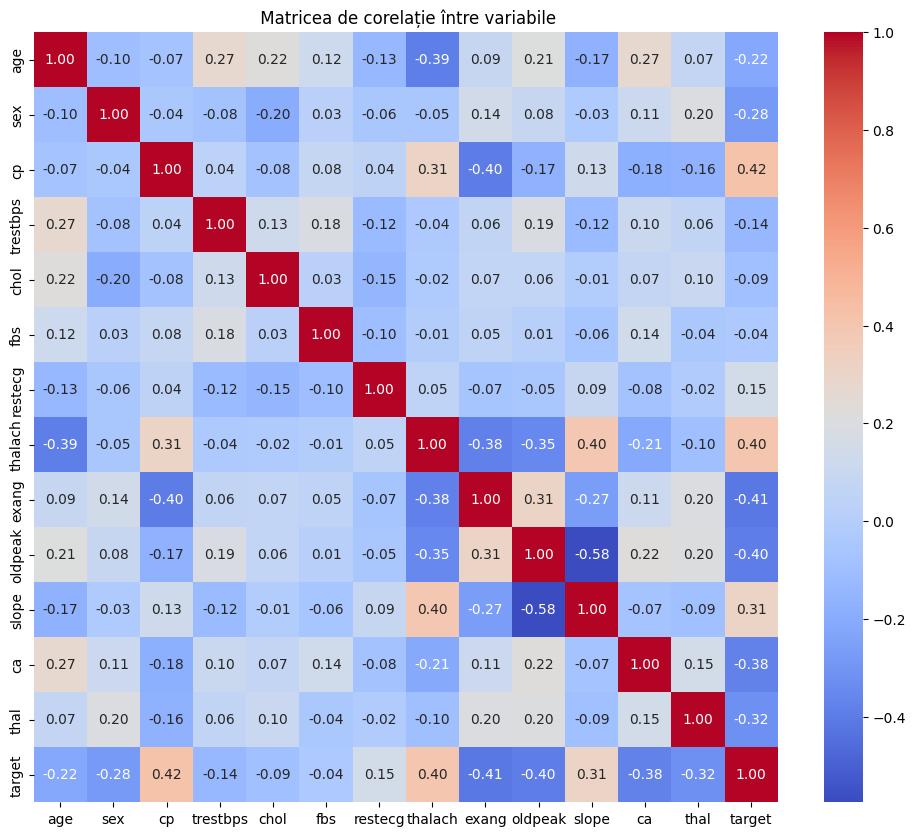

In [ ]:
# === 5. Matricea de corelație
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Matricea de corelație între variabile")
plt.show()

In [ ]:
# Caracteristici cu corelație slabă cu target (< 0.05)
correlation = data.corr()['target'].abs().sort_values()
low_corr = correlation[correlation < 0.05]
print("\n Coloane cu corelație slabă cu target:\n", low_corr)


 Coloane cu corelație slabă cu target:
 fbs    0.037065
Name: target, dtype: float64


In [ ]:
# === 6. Binarizarea coloanei 'target'
data['target'] = (data['target'] >= 0.5).astype(int)


In [ ]:
# === 7. Separare caracteristici și etichetă
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
# === 8. Împărțire în set de antrenare și test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# === 9. Standardizare
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# === 10. Antrenare model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# === 11. Predicții
y_pred = model.predict(X_test_scaled)

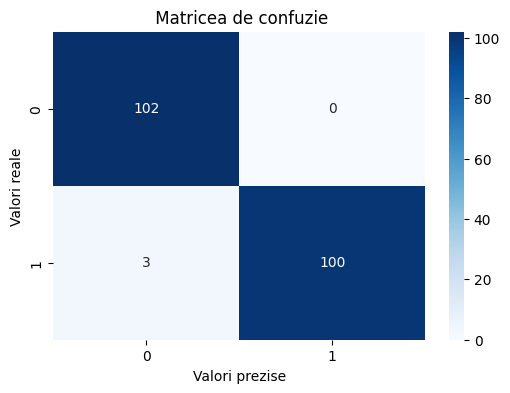

In [ ]:
# === 12. Matrice de confuzie
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title(" Matricea de confuzie")
plt.xlabel("Valori prezise")
plt.ylabel("Valori reale")
plt.show()

In [ ]:
# === 13. Tabel de clasificare
print("\n Tabel de clasificare:\n", classification_report(y_test, y_pred))
print(" Acuratețe:", accuracy_score(y_test, y_pred))


 Tabel de clasificare:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

 Acuratețe: 0.9853658536585366


In [ ]:
# === 14. Importanța caracteristicilor
importances = model.feature_importances_
feature_names = X.columns

/tmp/ipython-input-20-2346708173.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


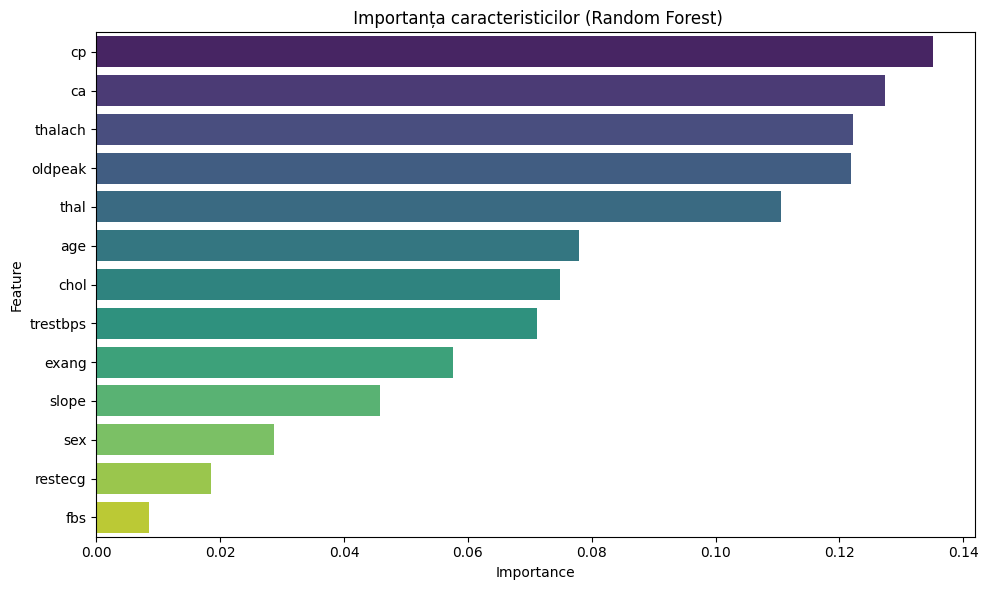

In [ ]:
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title(" Importanța caracteristicilor (Random Forest)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
def evaluate_model(model, name):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n Model: {name}")
    print(" Acuratețe:", round(acc, 4))
    print(" Raport de clasificare:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f"Matrice de Confuzie - {name}")
    plt.xlabel("Prezis")
    plt.ylabel("Real")
    plt.show()


 Model: Logistic Regression
 Acuratețe: 0.7951
 Raport de clasificare:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



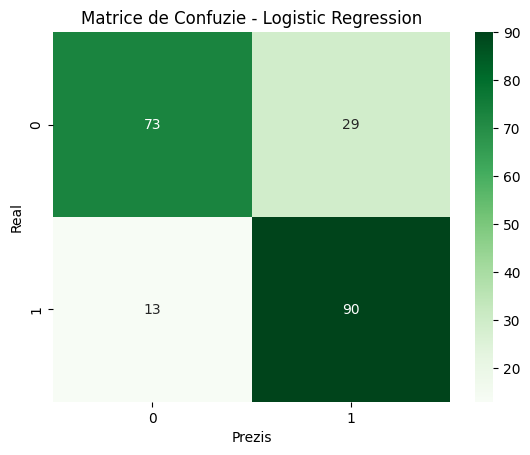


 Model: Support Vector Classifier (SVC)
 Acuratețe: 0.8878
 Raport de clasificare:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



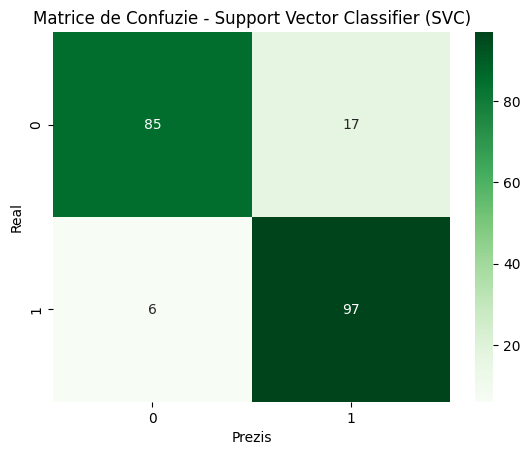


 Model: K-Nearest Neighbors
 Acuratețe: 0.8341
 Raport de clasificare:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



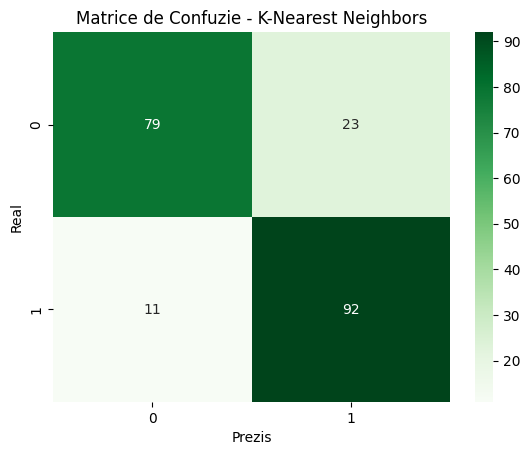


 Model: Random Forest
 Acuratețe: 0.9854
 Raport de clasificare:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



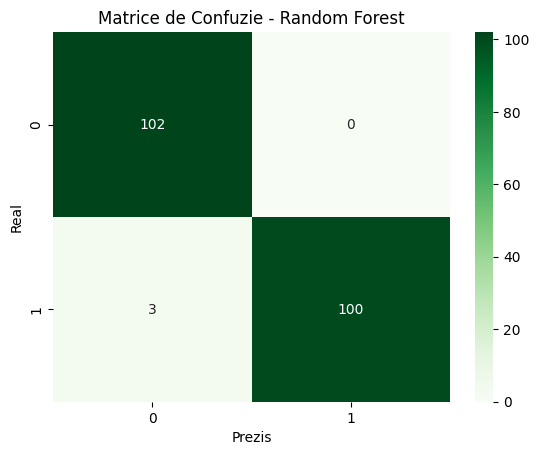


 Model: XGBoost
 Acuratețe: 0.9854
 Raport de clasificare:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:08:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


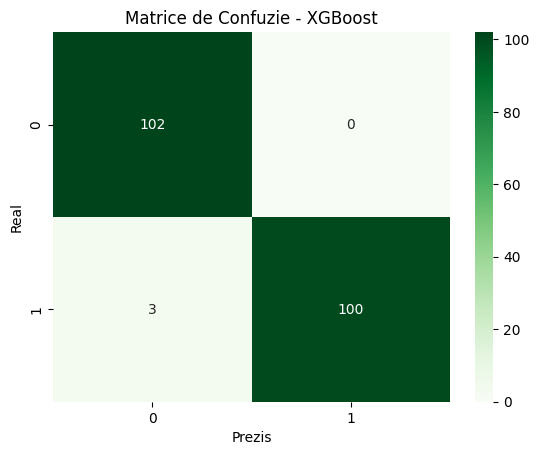

In [ ]:
# Logistic Regression
evaluate_model(LogisticRegression(max_iter=1000), "Logistic Regression")

# SVC
evaluate_model(SVC(kernel='rbf', C=1), "Support Vector Classifier (SVC)")

# KNN
evaluate_model(KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors")

# Random Forest
evaluate_model(RandomForestClassifier(random_state=42), "Random Forest")

# XGBoost
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")

In [ ]:
# Îl folosim ca pseudo-clasificator
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)
y_pred_kmeans = kmeans.predict(X_test_scaled)

In [ ]:
# Corectăm etichetele (KMeans poate inversa clasele)
from scipy.stats import mode
mode_label = mode(y_test[y_pred_kmeans == 1], keepdims=True).mode[0]
y_pred_kmeans = np.where(y_pred_kmeans == 1, mode_label, 1 - mode_label)


 Model: KMeans Clustering
 Acuratețe: 0.7659
 Raport de clasificare:
              precision    recall  f1-score   support

           0       0.86      0.64      0.73       102
           1       0.71      0.89      0.79       103

    accuracy                           0.77       205
   macro avg       0.78      0.77      0.76       205
weighted avg       0.78      0.77      0.76       205



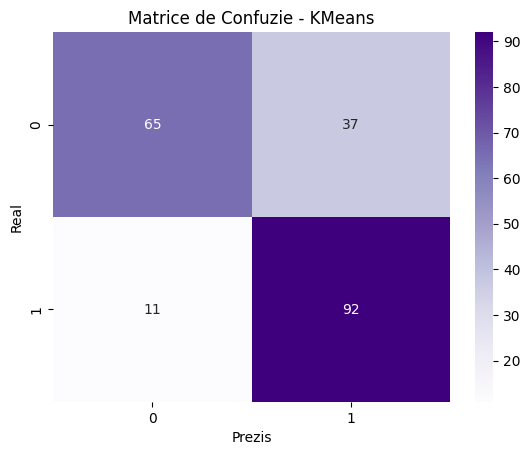

In [ ]:
print("\n Model: KMeans Clustering")
print(" Acuratețe:", round(accuracy_score(y_test, y_pred_kmeans), 4))
print(" Raport de clasificare:")
print(classification_report(y_test, y_pred_kmeans))
cm_kmeans = confusion_matrix(y_test, y_pred_kmeans)
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Purples')
plt.title("Matrice de Confuzie - KMeans")
plt.xlabel("Prezis")
plt.ylabel("Real")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# 1. Încarcă datele
df = pd.read_csv('heart.csv')


In [ ]:
# 2. Separăm caracteristicile de variabila țintă
X = df.drop('target', axis=1)
y = df['target']


In [ ]:
# 3. Împărțim în set de antrenare și test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 4. Standardizăm datele (foarte important pentru MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Conversie clară în clasă binară dacă sunt probabilități
y = df['target']

# Dacă target-ul e probabilitate între 0 și 1 (float), convertim în clasă
if y.dtype != 'int' and y.dtype != 'int64':
    y = (y >= 0.5).astype(int)

# Verificăm rezultatul
print("Etichete unice după conversie:", y.unique())
print("Tip date:", y.dtype)


Etichete unice după conversie: [0 1]
Tip date: int64


In [ ]:
X = df.drop('target', axis=1)

# Împărțim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scalăm
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)


In [ ]:
# Evaluare
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report MLP:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report MLP:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Accuracy Score: 0.9853658536585366


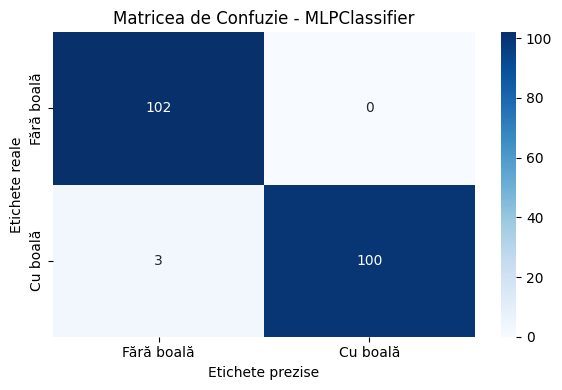

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Creează matricea
cm = confusion_matrix(y_test, y_pred)

# Desenăm matricea
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fără boală', 'Cu boală'], yticklabels=['Fără boală', 'Cu boală'])
plt.xlabel('Etichete prezise')
plt.ylabel('Etichete reale')
plt.title('Matricea de Confuzie - MLPClassifier')
plt.tight_layout()
plt.show()
